# Topic 3: Search Algorithms
## Problem Solving as Search
## Artificial Intelligence 1, Week 11



## This Week
### Lecture:
- Recap of input-model-output 
- Problem solving as search through space of  representations of candidate solutions
- The process: constructive  vs perturbative (holistic) approaches 
- Landscapes, properties of search spaces

## Learning Outcomes
- Recognise and characterise Problem solving as search
- Formulate problems via representations of candidate solutions allowing the use of standard algorithms, search on a graph 
- Able to characterise properties of search algorithms

# Recap
(parts of) computers do things in a sequence

<div >
<div style="float:left; width: 25%;">
    <h3>Input</h3> 
    <ul>
        <li>keyboard</li>
        <li> mouse</li>
        <li> joystick</li>
        <li> camera</li>
        <li>microphone</li>
        <li><b> another computer or programme</b></li>
     </ul>
  </div>
 
    
 <div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    of a process or part of the world
    <ul>
        <li>designed by a person</li>
        <li> or learned by an algorithm</li>
    </ul>
</div>

<div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
</div>

 <div style="float:left; width:25%">
    <h3>Output</h3> 
    <ul>
        <li>screen</li>
        <li> motor</li>
        <li>loudspeaker</li>
        <li><b> another computer or programme</b></li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>

# Recap 2: Different types of question pose different types of problems

Problem Solving <==> one of the three parts is missing.

Different types of problem are associated with different questions.

<div >
<div style="float:left; width: 30%;">
    <h3>Input</h3> 
    <ul>
        <li>how do I?</li>
        <li> what's the best/quickest/...?</li>
     </ul>
  </div>

 <div style = "float:left;width:5%">
<br> <br>.
 </div>

    
    
<div style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    <ul>
        <li>how does X relate to Y?</li>
        <li>how do these symptons link to diagnosis?</li>
    </ul>
</div>

<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
 <div style="float:left; width:30%">
  <h3>Output</h3> 
    <ul>
        <li>who/what is this?</li>
        <li> what will happen if ...?</li>
        <li>what will the ... be tomorrow?</li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>

# So we can define three types of problem according to what is missing

<div >
<div style="float:left; width: 30%;border:2px">
    <h3>Optimisation</h3>
    <b>Given</b>
    <ul>
        <li>A model of the situation</li>
        <li>Some constraints about the output</li>
     </ul><br>
    <b>Find</b> the  inputs that produce the desired output.
    <br><small>Sometimes called <b><i>planning</i></b> when the answer is a sequence of inputs.</small>
  </div>
 
<div style = "float:left;width:5%">
<br> <br>.<br>
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Modelling</h3>
    <b>Given</b>:
    <ul>
        <li> A set of inputs (examples)</li>
        <li> corresponding outputs/labels</li>
       </ul>
    <br>
    <b>Find</b> the model that:
       <ul>
        <li>Maps the known inputs onto their outputs</li>
           <li> And generalises to new cases</li>
       </ul>
</div>


 <div style = "float:left;width:5%">
<br> <br>.
 </div>


 <div style="float:left; width:30%">
  <h3>Prediction</h3> 
     <b>Given</b>:
    <ul>
        <li>a model of the situation / process</li>
        <li> some inputs</li>
     </ul>
     <b>Find</b> the correct output (prediction)
</div>
<br style="clear:left;"/>        
 </div>
 
 ## and we can describe these all as searching through a space of possible solutions for the best one

## How to Formulate Problems As Search

1. Work out what variables are needed to define any possible solution
 - E.g., sequence of moves/actions,  set of design variables, rules, weights for neural net,   class
 - How many decisions do you need to make to specify a solution?
 - What type of variable is needed to encode each of those decisions (Bool/Int/Float ...)
 - Define a type (class) CandidateSolution  that holds all those variables 

2. Decide if all solutions have the same complexity or not 
 - e.g. planning angry birds shot by shot,  vs multi-shot plan
 - Each individual solution is an **instance** of type CandidateSolution   
   with a set of specific values for each variable
 

3. Define operators to move between candidate solutions
 - Same complexity: change some values  : **Perturbative Search**  
   e.g. change weights in a Multi Layer Perceptron
 - Different complexity: add/remove values: **Constructive Search**  
   e.g.   
   adding rules in greedy constructive rule induction  
   splitting a node in a decision tree

## Quick quiz:

- I feel confident that I could code up an algorithm to solve Sudoku [True : False]

- I feel it is worthwhile to code up a dedicated algorithm to solve Sudoku[True:False]

## Big Idea of the day 2: Representation + Move operator = landscape

If we know how we are allowed to (or have written code to) change solutions 
- Then we know how which are ‘neighbours’ at 1 step, 2 steps, … n steps
- This defines a neighourhood structure
- And turns our ‘bag’ of solutions into a **landscape**.  
  with an extra dimension for ‘quality of solution”
  
Because our brains are conditioned to moving around on the surface of the earth, this is a really useful metaphor
- First coined by a biologist, Sewall-Wright, in 1932
- Now used intensively in theoretical studies of search


## Adaptive Landscape Metaphor

- Take solutions characterised by n variables
- Add an extra measure of quality
- Embed in a n+1-dimensional space (landscape) 
 - Point on the landscape = potential solution.
- Aim of search is to find the highest point,
  - or one that is “high enough” .
- Can always convert to equivalent minimisation problem 
  - e.g. "find the lowest point on an error landscape" < => "find the highest point on an accuracy landscape"
- So **search = path through space**


## Example 2-input perceptron learning the AND problem
- So that we can visualise it in 3d we will fix the bias weight  
  and plot 
   - w<sub>1</sub> on the x-axis, 
   - w<sub>2</sub> on the z-axis, and 
   - the number of errors on the y-axis of a 3d plot.


In [2]:
## demo,   2 inmput perceptron learning and/or,  fix bias weight a nd outplut w1,w2,num_errorrs at each timestep then show on a 3Dplot
from random import random
import numpy as np

class two_input_perceptron:
    def  __init__( self,learningRate):
        self.weight1 = random()
        self.weight2 = random()
        self.biasweight =  random()
        self.bias=1
        self.learningRate = learningRate
        print(" starting with initial random weights {:.4f}, {:.4f} and {:.4f}".format(self.weight1,self.weight2,self.biasweight))
        
    def predict(self, input1, input2) -> int: # let it take continuous inputs
        summedInput = input1*self.weight1 +input2*self.weight2 + self.bias*self.biasweight
        if summedInput>0:
            return 1
        else:
            return 0

    def update_weights( self, in1, in2, target):
        error = target - self.predict(in1,in2)
        if(error == 0):
            return 0
        else:
            self.biasweight += error * 1 *self.learningRate # bias is always +1
            if (in1>0):
                self.weight1 += error * in1 * self.learningRate
            if (in2>0):
                self.weight2 += error * in2 * self.learningRate           
            return 1
                
    def fit(self,train_X,train_y, maxEpochs,verbose=True):
        for epoch in range (maxEpochs):
            errors = 0
            for testcase in range (len(train_y)):
                errors += self.update_weights(train_X[testcase][0], train_X[testcase][1],train_y[testcase])
            if(errors ==0):
                break
        return errors
    def getWeights(self):
        return self.biasweight, self.weight1, self.weight2
    

<IPython.core.display.Javascript object>


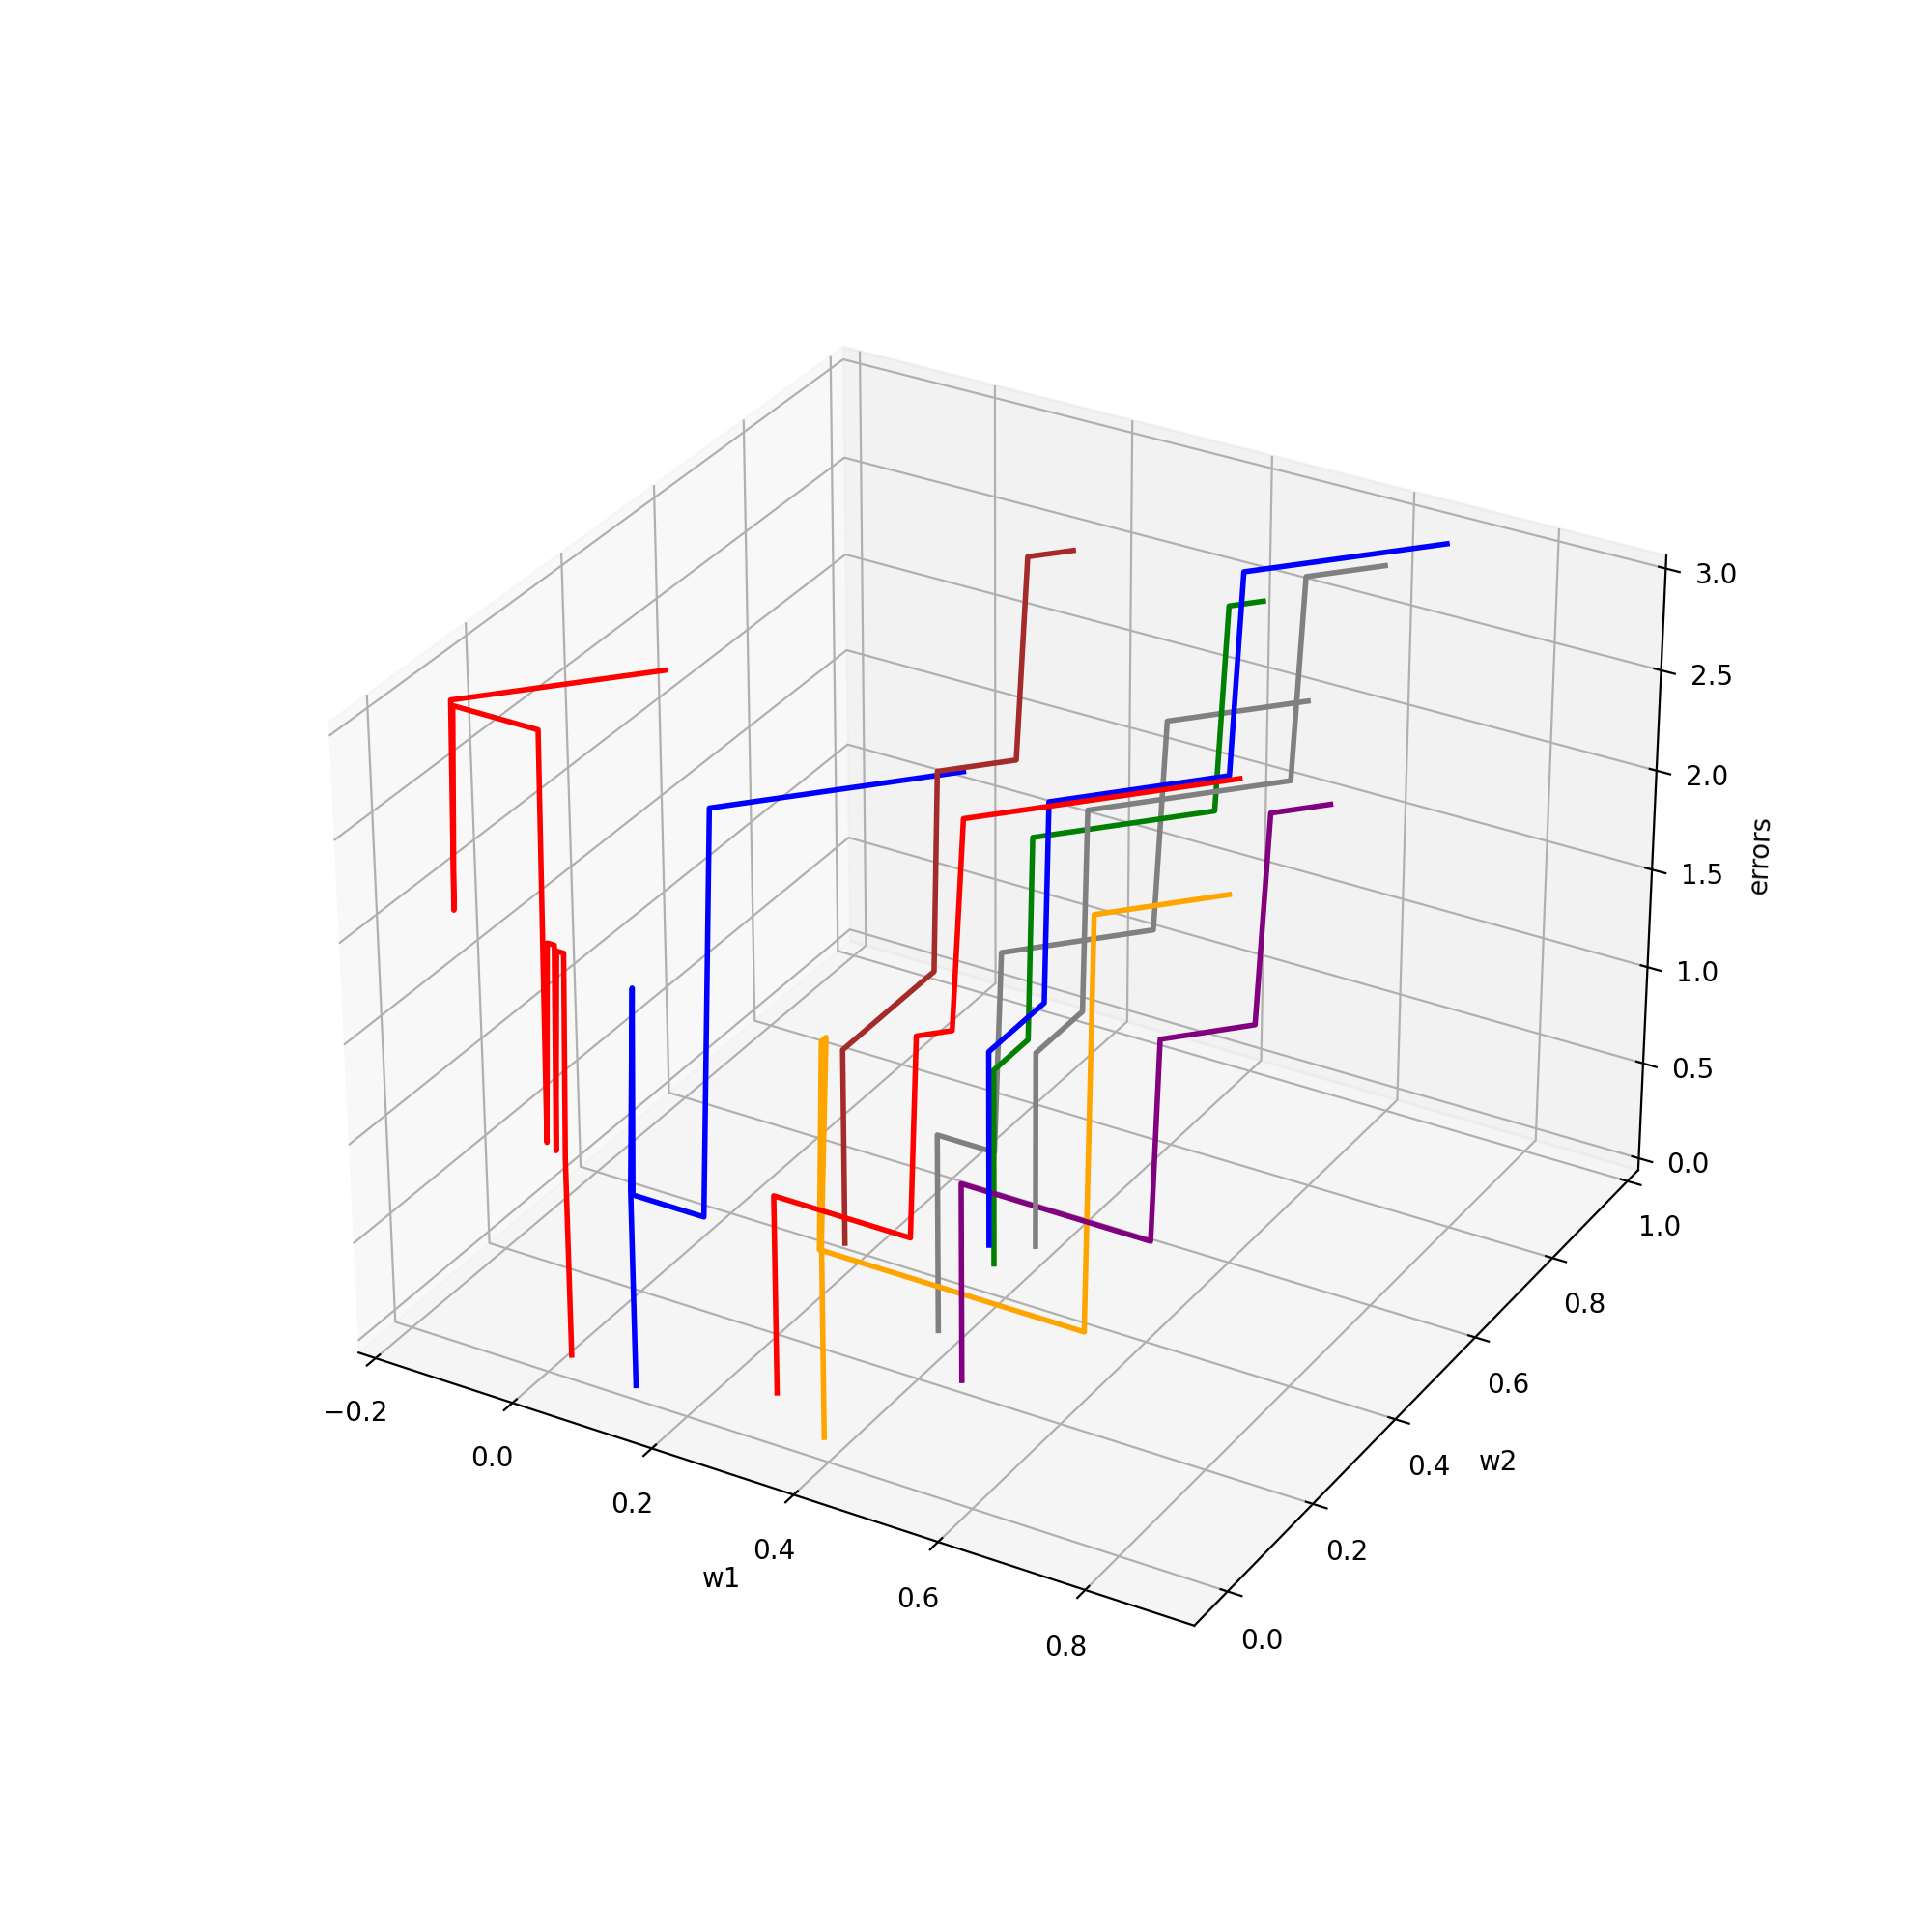

run 0
 starting with initial random weights 0.7397, 0.5484 and 0.3630
 finished after 36 epochs
run 1
 starting with initial random weights 0.4742, 0.2141 and 0.6728
 finished after 36 epochs
run 2
 starting with initial random weights 0.0396, 0.2515 and 0.7180
 finished after 40 epochs
run 3
 starting with initial random weights 0.5720, 0.7359 and 0.0942
 finished after 30 epochs
run 4
 starting with initial random weights 0.8814, 0.1198 and 0.3476
 finished after 52 epochs
run 5
 starting with initial random weights 0.3061, 0.7378 and 0.1366
 finished after 35 epochs
run 6
 starting with initial random weights 0.8815, 0.3503 and 0.1573
 finished after 42 epochs
run 7
 starting with initial random weights 0.6562, 0.8842 and 0.2309
 finished after 39 epochs
run 8
 starting with initial random weights 0.6945, 0.9691 and 0.5664
 finished after 50 epochs
run 9
 starting with initial random weights 0.7612, 0.3520 and 0.7021
 finished after 48 epochs


In [3]:
%matplotlib notebook

#set up grid
X = np.asarray( [0,0,0,1,1,0,1,1])
X=X.reshape(4,2)
y = [0,0,0,1]
samplepoints = np.empty((0,4))

#set up figure to dispaly grid
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

colours = ['gray','blue','red','green','orange','brown','purple']
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('errors')

#now plot the learning curves of errors vs weights
for run in range (10):
    print('run {}'.format(run))
    
    #make new perceptron object
    myPerceptron = two_input_perceptron(0.01)    
    for epoch in range(100):

        # train for one epoch
        errors = myPerceptron.fit(X,y,maxEpochs=1,verbose=False)
        _, w1,w2 = myPerceptron.getWeights()

        # store weights and errors for these weights
        samplepoints = np.vstack((samplepoints,[run,w1,w2,errors]))
        if (errors==0):
            print(' finished after {} epochs'.format(epoch))
            break

    # add run path to plot
    data = samplepoints[np.where(samplepoints[:,0] == run)]
    zline = data[:,3]
    xline = data[:,1]
    yline = data[:,2]
    thisColour = colours[run%7]
    ax.plot3D(xline, yline, zline, thisColour,linewidth=2)


## Continuous Search Spaces<img src="figures/3D-landscape.png" style="float:right" width=30%>
- Variables defining candidate solutions  are “real numbers”  
  (floats/doubles)  
- Number of solutions only limited by precision of coding
- Can often apply mathematical techniques like  
  differentiation, linear programming etc,   
  as long as:
   - the functions are not discontinuous (i.e. no 'cliffs')
   - there are not too many optima
- Natural sense of “distance” between solutions   
  E.g. based on Euclidean distance (straight line)
- Allows us to talk about 
  **local** and **global** optima

## Combinatorial Search Spaces
- Variables defining candidate solutions are:
  - Binary / Boolean, 
  - Categorical labels (no natural order),
  - Ordinal variables (e.g. integers),
  - or permutations
- **Countable** number of of solutions
- Sometimes the problem definition will tell us how they can be connected, other times not.
- Needs a different kind of search method, 
- especially if we want to prove that we have the “best” solution


## Different ways of changing solutions ( move operators) create different  landscapes<img src="figures/chess-pieces.png" style="float:right">

For some problems the structure is natural.

But sometimes “local”  depends on how we move.

E.g. neighbours of King, knight, bishop, rook in chess

<img src="figures/chess-moves.png" width = 80%>


## Quiz 2:

- A local optimum is better than all its neighbours? [True | False]
- The global optimum is the same however you define the landscape [True | False]
- A point that is locally optimal for one landscape, will still be if you change the move operator? [True| False]

## Properties of Search Algorithms

Ways of generating solutions would ideally be:
- Optimal 
- Efficient 
- Complete 

<div> 
    <div style= "float:left" width=25%><img src="figures/complete.png" width=50%> </div>
    <div  style="float:left" width=25%><img src="figures/efficient.png" width=50%></div>
    <div style= "float:left" width=25%><img src="figures/optimal.png" width=50%></div>
</div>


## Quiz: Starting from any given square, can a bishop  do a complete search of a chess board?

## 3rd big idea of the day: Search using a Generate-test loop

A common framework we can use for different problems, and to get different algorithms

    1.   Set WorkingMemory = Empty
    2.   Initialise (CandidateSolution)
    3.   Test ( CandidateSolution)
    4.   UpdateWorkingMemory()
    5.   While ( goal_not_found AND possibilities_left) DO
    6.         CandidateSolution <- Generate ()
    7.	       Test ( CandidateSolution)
    8.         UpdateWorkingMemory()
    9.   OD
    10.  Return (success or failure as appropriate).  

Often we divide working memory into open list and closed list

Usually generate() will apply a move operator to  something from our working memory.  
The Open list holds Candidate solutions we know about but haven’t tested yet.  
The Closed list holds Candidate solutions we’ve tested but didn’t meet our goal criteria




## Quiz: Exhaustive Search is:
- Complete?
- Optimal?
- Efficient?


## Quiz: In which if these situations might optimality be less important than efficiency?

- Speech recognition software for dictation
- Fingerprint recognition in a biometric access system 
- Neither
- Both


## Search summary
To solve any problem on a computer we have to define a set of variables relating to the problem
- Assigning values to variables <=> **generating** candidate solution

- **Testing** a candidate solution <=> decoding set of variables into something relevant to the problem and then try it out

- Generation <=> applying move operators to past solutions
  - If some variables can be undefined, or added during generation, we have a constructive search
  - If we have to specify every value during generation, we have a perturbative search
- Move operators define a landscape
- Search<=> moving through a landscape to find best point
 - search algorithms might be one or more of **optimal**, **complete**, and **efficient**

